#### 2.Consider the 	Zachary’s karate club network from the movie karate kids. Here Zachary tried to analyze conflicts and fission in small groups. The dataset called karate.gml 	can be read using NetworkX and can be obtained from https://doi.org/10.6084/m9.figshare.7985174.v1 .[GML - Graph Modelling Language.]  It contains 34 nodes representing individuals within the karate club. The edges in the network are given by interactions between two individuals outside the activities of the club such as actual lessons or meetings. 
#### i. create a graph from the 	karate.gml file. Display all the basic information about the network.
#### ii. Store all the metadata of the actors in the network.
#### iii. Calculate all types of centrality (degree, betweenness, closeness, eigenvector, pagerank centrality). Analyse the nodes based on the centrality values. Write a note on this. 
#### iv. Find the possible k-components of the network and the clustering coefficient.
#### v. Find out the communities using Girvan-Newman algorithm and Louvain method. 


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:

# Load the graph from the GML file
G = nx.read_gml("C:/Users/91709/Downloads/ADS-main/ADS Assignment/2/karate.gml")

In [3]:
#i) Display all the basic information about the network
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is connected:", nx.is_connected(G))
print("Diameter:", nx.diameter(G))
print("Average shortest path length:", nx.average_shortest_path_length(G))

Number of nodes: 34
Number of edges: 78
Is connected: True
Diameter: 5
Average shortest path length: 2.408199643493761


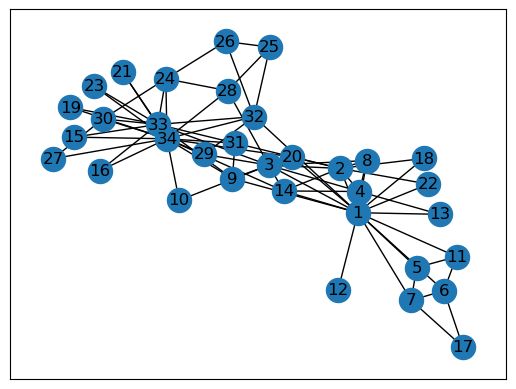

In [4]:
nx.draw_networkx(G)

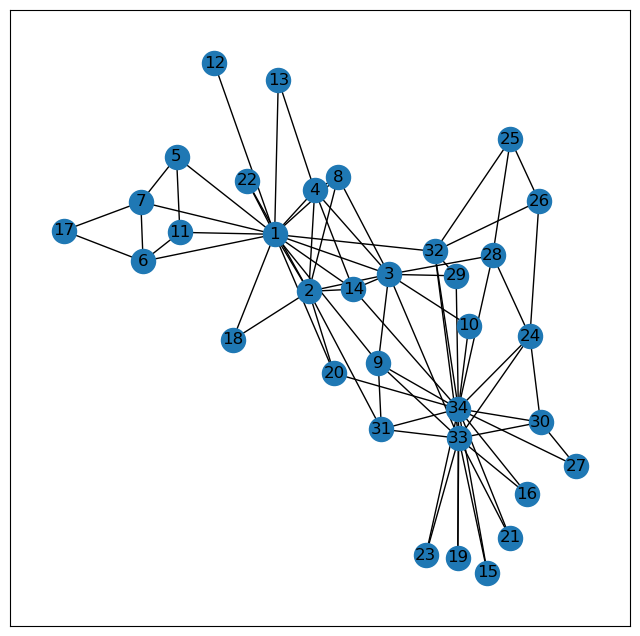

In [5]:
#other way of plotting
plt.figure(figsize=(8,8))
nx.draw_networkx(G)
plt.show()

In [6]:
# ii) Store all the metadata of the actors in the network
metadata = {}
for node in G.nodes(data=True):
    metadata[node[0]] = node[1]

In [7]:
# iii) Calculate all types of centrality (degree, betweenness, closeness, eigenvector, pagerank centrality)
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G)
pagerank_centrality = nx.pagerank(G)

In [8]:
print("\nCentrality values for each node:")
for node in G.nodes:
    print(f"Node {node}: Degree Centrality = {degree_centrality[node]}, "
          f"Betweenness Centrality = {betweenness_centrality[node]}, "
          f"Closeness Centrality = {closeness_centrality[node]}, "
          f"Eigenvector Centrality = {eigenvector_centrality[node]}, "
          f"PageRank Centrality = {pagerank_centrality[node]}")



Centrality values for each node:
Node 1: Degree Centrality = 0.48484848484848486, Betweenness Centrality = 0.43763528138528146, Closeness Centrality = 0.5689655172413793, Eigenvector Centrality = 0.3554914445245667, PageRank Centrality = 0.09700181758983706
Node 2: Degree Centrality = 0.2727272727272727, Betweenness Centrality = 0.053936688311688304, Closeness Centrality = 0.4852941176470588, Eigenvector Centrality = 0.2659599195524915, PageRank Centrality = 0.052878391037427
Node 3: Degree Centrality = 0.30303030303030304, Betweenness Centrality = 0.14365680615680618, Closeness Centrality = 0.559322033898305, Eigenvector Centrality = 0.3171925044864316, PageRank Centrality = 0.05707842304763673
Node 4: Degree Centrality = 0.18181818181818182, Betweenness Centrality = 0.011909271284271283, Closeness Centrality = 0.4647887323943662, Eigenvector Centrality = 0.21117972037789032, PageRank Centrality = 0.035860643223064786
Node 5: Degree Centrality = 0.09090909090909091, Betweenness Centr

In [9]:
for node in sorted(degree_centrality, key=degree_centrality.get, reverse=True):
  print(node, degree_centrality[node])

34 0.5151515151515151
1 0.48484848484848486
33 0.36363636363636365
3 0.30303030303030304
2 0.2727272727272727
4 0.18181818181818182
32 0.18181818181818182
9 0.15151515151515152
14 0.15151515151515152
24 0.15151515151515152
6 0.12121212121212122
7 0.12121212121212122
8 0.12121212121212122
28 0.12121212121212122
30 0.12121212121212122
31 0.12121212121212122
5 0.09090909090909091
11 0.09090909090909091
20 0.09090909090909091
25 0.09090909090909091
26 0.09090909090909091
29 0.09090909090909091
10 0.06060606060606061
13 0.06060606060606061
15 0.06060606060606061
16 0.06060606060606061
17 0.06060606060606061
18 0.06060606060606061
19 0.06060606060606061
21 0.06060606060606061
22 0.06060606060606061
23 0.06060606060606061
27 0.06060606060606061
12 0.030303030303030304


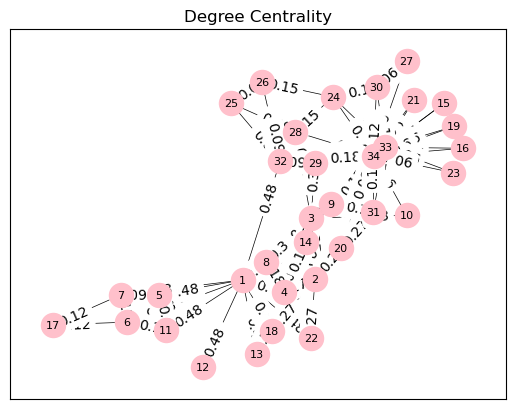

In [10]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='pink')
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: round(degree_centrality[e[0]], 2) for e in G.edges()}, label_pos=0.3)
plt.title('Degree Centrality')
plt.show()

In [11]:
for node in sorted(betweenness_centrality , key=betweenness_centrality .get, reverse=True):
  print(node, betweenness_centrality [node])

1 0.43763528138528146
34 0.30407497594997596
33 0.145247113997114
3 0.14365680615680618
32 0.13827561327561325
9 0.05592682780182781
2 0.053936688311688304
14 0.04586339586339586
20 0.03247504810004811
6 0.02998737373737374
7 0.029987373737373736
28 0.02233345358345358
24 0.017613636363636363
31 0.014411976911976909
4 0.011909271284271283
26 0.0038404882154882154
30 0.0029220779220779218
25 0.0022095959595959595
29 0.0017947330447330447
10 0.0008477633477633478
5 0.0006313131313131313
11 0.0006313131313131313
8 0.0
12 0.0
13 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
21 0.0
22 0.0
23 0.0
27 0.0


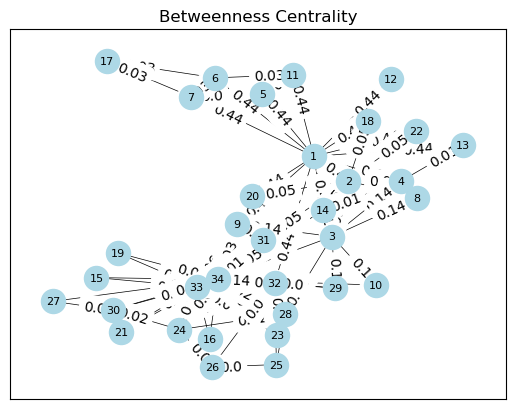

In [12]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: round(betweenness_centrality[e[0]], 2) for e in G.edges()}, label_pos=0.3)
plt.title('Betweenness Centrality')
plt.show()

In [13]:
for node in sorted(closeness_centrality , key=closeness_centrality .get, reverse=True):
  print(node,closeness_centrality [node])

1 0.5689655172413793
3 0.559322033898305
34 0.55
32 0.5409836065573771
9 0.515625
14 0.515625
33 0.515625
20 0.5
2 0.4852941176470588
4 0.4647887323943662
28 0.4583333333333333
31 0.4583333333333333
29 0.4520547945205479
8 0.44
10 0.4342105263157895
24 0.39285714285714285
6 0.38372093023255816
7 0.38372093023255816
30 0.38372093023255816
5 0.3793103448275862
11 0.3793103448275862
18 0.375
22 0.375
25 0.375
26 0.375
13 0.3707865168539326
15 0.3707865168539326
16 0.3707865168539326
19 0.3707865168539326
21 0.3707865168539326
23 0.3707865168539326
12 0.36666666666666664
27 0.3626373626373626
17 0.28448275862068967


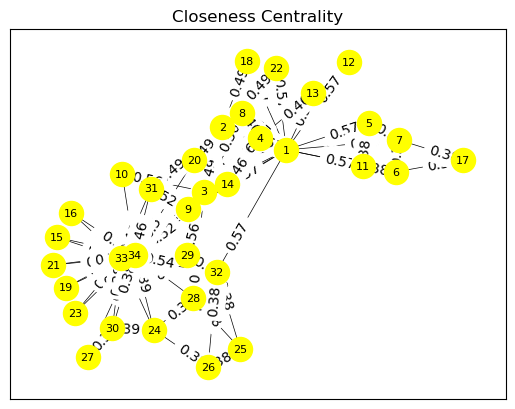

In [14]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='yellow')
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: round(closeness_centrality[e[0]], 2) for e in G.edges()}, label_pos=0.3)
plt.title('Closeness Centrality')
plt.show()

In [15]:
for node in sorted(eigenvector_centrality , key=eigenvector_centrality.get, reverse=True):
  print(node, eigenvector_centrality [node])

34 0.3733634702914831
1 0.3554914445245667
3 0.3171925044864316
33 0.3086442197910474
2 0.2659599195524915
9 0.22740390712540012
14 0.2264727201424813
4 0.21117972037789032
32 0.19103384140654373
31 0.17475830231435288
8 0.17095974804479636
24 0.1501185718611528
20 0.1479125102933875
30 0.13496081926232784
28 0.13347715338024022
29 0.13107782298371073
10 0.10267425072358632
21 0.10140326218952458
16 0.10140326218952457
19 0.10140326218952457
15 0.10140326218952456
23 0.10140326218952456
22 0.09239953819570261
18 0.09239953819570254
13 0.08425462871671373
6 0.07948304511709932
7 0.0794830451170993
5 0.07596881818306885
11 0.0759688181830688
27 0.07557941348827212
26 0.05920647491677844
25 0.0570524405411656
12 0.0528556974935213
17 0.02363562810459128


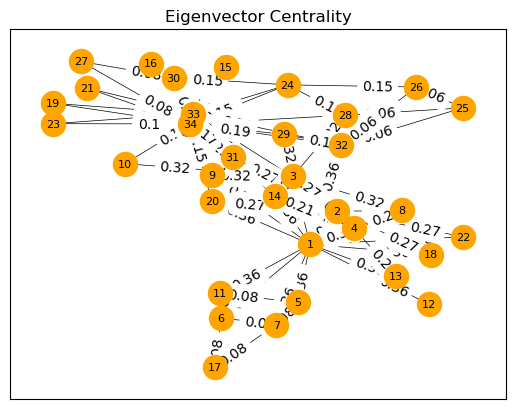

In [16]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='orange')
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: round(eigenvector_centrality[e[0]], 2) for e in G.edges()}, label_pos=0.3)
plt.title('Eigenvector Centrality')
plt.show()

In [17]:
for node in sorted(pagerank_centrality , key=pagerank_centrality .get, reverse=True):
  print(node, pagerank_centrality [node])

34 0.1009179167487121
1 0.09700181758983706
33 0.07169213006588289
3 0.05707842304763673
2 0.052878391037427
32 0.037156635922679405
4 0.035860643223064786
24 0.03152091531163227
9 0.029765339186167028
14 0.02953631497720298
6 0.02911334166344221
7 0.029113341663442205
30 0.026287262837112076
28 0.025638803528350497
31 0.024589336534292478
8 0.02449075803950918
5 0.021979406974834498
11 0.021979406974834494
25 0.021075455001162945
26 0.02100562817474579
20 0.01960441671193729
29 0.019572960509438537
17 0.016785378110253487
27 0.015043395360629753
13 0.014645186487916188
18 0.01455885977424349
22 0.01455885977424349
15 0.014535161524273824
16 0.014535161524273824
19 0.014535161524273824
21 0.014535161524273824
23 0.014535161524273824
10 0.014308950284462798
12 0.009564916863537146


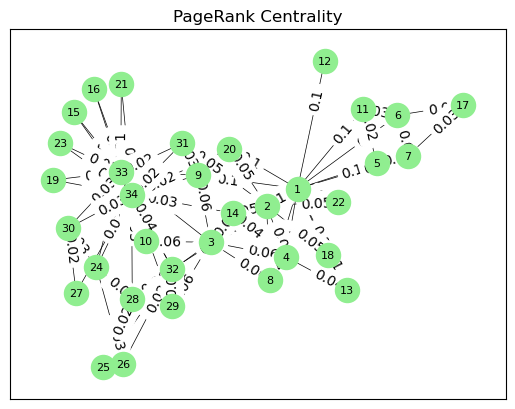

In [18]:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='lightgreen')
nx.draw_networkx_edges(G, pos, width=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels={e: round(pagerank_centrality[e[0]], 2) for e in G.edges()}, label_pos=0.3)
plt.title('PageRank Centrality')
plt.show()

In [19]:
# iv) Find the possible k-components of the network and the clustering coefficient
k_components = nx.k_components(G)
clustering_coefficient = nx.average_clustering(G)

In [20]:
print("\nPossible k-components of the network:")
print(k_components)
print("\nClustering Coefficient of the network:", clustering_coefficient)


Possible k-components of the network:
{4: [{'34', '1', '31', '2', '9', '33', '8', '4', '14', '3'}], 3: [{'30', '20', '25', '4', '1', '2', '26', '9', '32', '14', '34', '31', '24', '33', '29', '8', '28', '3'}, {'6', '1', '11', '5', '7'}], 2: [{'30', '25', '20', '4', '1', '2', '26', '19', '9', '21', '32', '23', '22', '13', '14', '34', '16', '31', '24', '33', '10', '27', '18', '29', '8', '28', '3', '15'}, {'6', '1', '11', '17', '5', '7'}], 1: [{'30', '25', '2', '12', '19', '32', '23', '22', '13', '14', '16', '5', '33', '29', '18', '27', '11', '8', '7', '20', '4', '6', '1', '17', '26', '9', '21', '34', '31', '24', '10', '28', '3', '15'}]}

Clustering Coefficient of the network: 0.5706384782076823


In [21]:
# v) Find out the communities using Girvan-Newman algorithm and Louvain method
communities_girvan_newman = nx.community.girvan_newman(G)
communities_louvain = nx.community.kernighan_lin_bisection(G)


In [22]:
girvan_newman_communities = list(nx.community.girvan_newman(G))
louvain_communities = nx.community.greedy_modularity_communities(G)

In [23]:
print("\nCommunities using Girvan-Newman algorithm:")
print(girvan_newman_communities)
print("\nCommunities using Louvain method:")
print(louvain_communities)


Communities using Girvan-Newman algorithm:
[({'20', '6', '1', '2', '12', '17', '5', '18', '8', '11', '22', '13', '4', '14', '7'}, {'30', '25', '19', '32', '23', '16', '33', '29', '27', '26', '9', '21', '34', '31', '24', '10', '28', '3', '15'}), ({'20', '6', '1', '2', '12', '17', '5', '18', '8', '11', '22', '13', '4', '14', '7'}, {'30', '34', '25', '16', '31', '26', '24', '19', '9', '33', '21', '29', '32', '27', '23', '28', '3', '15'}, {'10'}), ({'20', '1', '2', '12', '18', '8', '22', '13', '4', '14'}, {'30', '34', '25', '16', '31', '26', '24', '19', '9', '33', '21', '29', '32', '27', '23', '28', '3', '15'}, {'6', '17', '5', '11', '7'}, {'10'}), ({'20', '1', '2', '12', '18', '8', '22', '13', '4', '14'}, {'25', '26', '29', '32', '28', '3'}, {'6', '17', '5', '11', '7'}, {'30', '34', '16', '31', '19', '24', '9', '33', '21', '27', '23', '15'}, {'10'}), ({'20', '1', '2', '13', '18', '22', '8', '4', '14'}, {'25', '26', '29', '32', '28', '3'}, {'6', '17', '5', '11', '7'}, {'30', '34', '16', '